In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("G:\CHADUVUKORA_YEDAVA\data\data01.csv")

In [4]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [5]:
df=df[["age","BMI","diabetes","Systolic blood pressure","Diastolic blood pressure","Respiratory rate","heart rate","SP O2"]]

In [6]:
df.head()

,age,BMI,diabetes,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,heart rate,SP O2
0,72,37.588179,1,155.866667,68.333333,16.621622,68.837838,98.394737
1,75,NaN,0,140.000000,65.000000,20.851852,101.370370,96.923077
2,83,26.572634,0,135.333333,61.375000,23.640000,72.318182,95.291667
3,43,83.264629,0,126.400000,73.200000,21.857143,94.500000,93.846154
4,75,31.824842,0,156.560000,58.120000,21.360000,67.920000,99.280000


In [7]:
df.isnull().sum()

age                           0
BMI                         215
diabetes                      0
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
heart rate                   13
SP O2                        13
dtype: int64

In [8]:
df["BMI"].fillna(df["BMI"].median(), inplace=True)

In [9]:
df["SP O2"].fillna(df["SP O2"].mean(), inplace=True)
df["heart rate"].fillna(df["heart rate"].median(), inplace=True)
df["Systolic blood pressure"].fillna(df["Systolic blood pressure"].median(), inplace=True)
df["Diastolic blood pressure"].fillna(df["Diastolic blood pressure"].median(), inplace=True)

In [10]:
df["Respiratory rate"].fillna(df["Respiratory rate"].median(), inplace=True)

In [11]:
df['Diastolic blood pressure']=df['Diastolic blood pressure']/10
df['Respiratory rate']=df['Respiratory rate']/10
df['heart rate']=df['heart rate']/10
df['SP O2']=df['SP O2']/100
df['Systolic blood pressure']=df['Systolic blood pressure']/100

In [12]:
df.rename(columns={'Diastolic blood pressure':'Diastolic_blood_pressure','Respiratory rate':'Respiratory_rate','heart rate':'heart_rate','SP O2':'SPO2','Systolic blood pressure':'Systolic_blood_pressure'},inplace=True)

In [13]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor()

In [14]:
df.head()

,age,BMI,diabetes,Systolic_blood_pressure,Diastolic_blood_pressure,Respiratory_rate,heart_rate,SPO2
0,72,37.588179,1,1.558667,6.833333,1.662162,6.883784,0.983947
1,75,28.312474,0,1.400000,6.500000,2.085185,10.137037,0.969231
2,83,26.572634,0,1.353333,6.137500,2.364000,7.231818,0.952917
3,43,83.264629,0,1.264000,7.320000,2.185714,9.450000,0.938462
4,75,31.824842,0,1.565600,5.812000,2.136000,6.792000,0.992800


In [15]:
x=df.drop(['SPO2'],axis=1)
y=df['SPO2']

In [16]:
x.head()


,age,BMI,diabetes,Systolic_blood_pressure,Diastolic_blood_pressure,Respiratory_rate,heart_rate
0,72,37.588179,1,1.558667,6.833333,1.662162,6.883784
1,75,28.312474,0,1.400000,6.500000,2.085185,10.137037
2,83,26.572634,0,1.353333,6.137500,2.364000,7.231818
3,43,83.264629,0,1.264000,7.320000,2.185714,9.450000
4,75,31.824842,0,1.565600,5.812000,2.136000,6.792000


In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [18]:
y.head()

0    0.983947
1    0.969231
2    0.952917
3    0.938462
4    0.992800
Name: SPO2, dtype: float64

In [19]:
br.fit(xtrain,ytrain)

BaggingRegressor()

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
xtest

,age,BMI,diabetes,Systolic_blood_pressure,Diastolic_blood_pressure,Respiratory_rate,heart_rate
178,66,25.185185,0,1.359615,6.769231,2.019355,6.541667
606,71,25.951557,1,0.933214,5.246429,1.625000,7.041667
100,63,41.054688,1,1.232857,6.509524,1.891667,9.079167
1041,62,23.114187,1,1.249200,8.452000,2.082353,11.851852
242,68,38.676826,0,1.390870,7.817391,2.240000,9.644000
...,...,...,...,...,...,...,...
1065,51,70.848389,0,1.183478,8.260870,2.585185,11.504167
912,84,27.943088,0,1.068519,5.781481,1.760000,5.640741
260,69,49.461451,1,0.902000,4.552000,2.089655,9.027586
1011,83,21.127530,0,1.000000,4.963415,2.276744,9.702326


In [22]:
ypred=br.predict(xtest)

In [23]:
mean_absolute_error(ypred,ytest)

0.0190441826690958

In [24]:
import pickle
pickle.dump(br,open("oxy.pkl","wb"))

In [25]:
yn=br.predict(xtrain)

In [26]:
yn[0]

0.9844216911599999

In [27]:
m=pickle.load(open('oxy.pkl','rb'))

In [28]:
y=np.array([['72','37.588179','1','155.866667','68.333333','16.621622','68.837838']])
y

array([['72', '37.588179', '1', '155.866667', '68.333333', '16.621622',
        '68.837838']], dtype='<U10')

In [29]:
y.reshape(-1,1)
y.shape

(1, 7)

In [30]:
y=pd.DataFrame(y)

In [31]:
m.predict(y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


array([0.94802199])

In [33]:
import matplotlib as plt

In [35]:
# plt.figure(figsize=(8, 4))
# sns.histplot(y, bins=20, kde=True)
# plt.title('Distribution of SP O2')
# plt.xlabel('SP O2')
# plt.ylabel('Frequency')
# plt.show()
##negatively skeweed which means mean is less than the median of the data and mode is less than mean
#from the peak majority of the persons have 96% as spo2 level
#left end of the tail are outliers

AttributeError: module 'matplotlib' has no attribute 'figure'

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


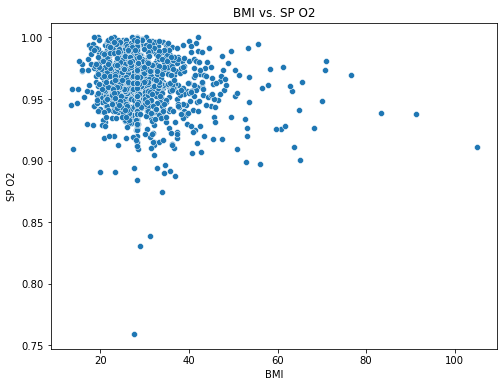

In [26]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot( x['BMI'],y)
    plt.title('BMI vs. SP O2')
    plt.xlabel('BMI')
    plt.ylabel('SP O2')
    plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


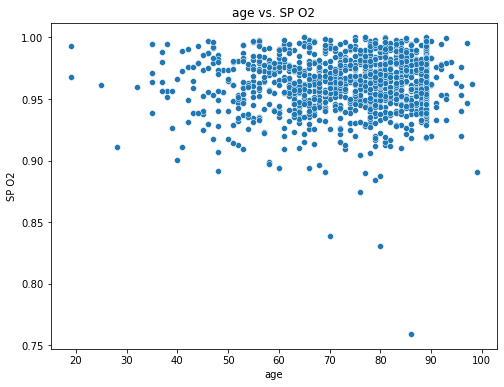

In [27]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x['age'],y)
    plt.title('age vs. SP O2')
    plt.xlabel('age')
    plt.ylabel('SP O2')
    plt.show()

In [37]:
import pickle
pickle.dump(m,open("oxy.pkl","wb"))

In [41]:
model=pickle.load(open('oxy.pkl',"rb"))

In [42]:
df=np.expand_dims([72,7.588179,1,155.866667,68.333333,16.621622,68.837838],axis=0)

In [43]:
d=pd.DataFrame(df)

In [44]:
p=model.predict(df)
p

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


array([0.94974353])

In [82]:
df.dtypes

age                           int64
BMI                         float64
diabetes                      int64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
heart rate                  float64
SP O2                       float64
dtype: object